In [ ]:
import logging
import scanpy as sc
%config InlineBackend.figure_format = 'retina'

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.basicConfig(format='%(name)s - %(levelname)s - %(message)s')

from thor.simulation import simulate_spot

In [3]:
ground_truth_adata_path = "S2R1_ground_truth.h5ad"
ad_true = sc.read_h5ad(ground_truth_adata_path)

In [4]:
ad_true.X = ad_true.layers['counts']
ad_true

AnnData object with n_obs × n_vars = 83538 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'xPixel', 'yPixel', 'mean_gray', 'std_gray', 'entropy_img', 'n_counts', 'leiden', 'mean_gray_log', 'std_gray_log'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Creating spots

In [6]:
ad_spot = simulate_spot(ground_truth_adata_path, spot_sep=spot_size, layer_key='counts', cell_label_keys=['leiden'])
ad_spot.write_h5ad(os.path.join(outdir, f"simulated_mousebrain_spotsize_{spot_size}_MERFISH.h5ad" ))
sc.pp.normalize_total(ad_spot)
sc.pp.log1p(ad_spot)

simulation - INFO - Creating spots. Spot positions are estimated according to the single cell positions in obsm['spatial'].
/Users/pengzhizhang/miniconda3/envs/histocartography/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
... storing 'major leiden' as categorical


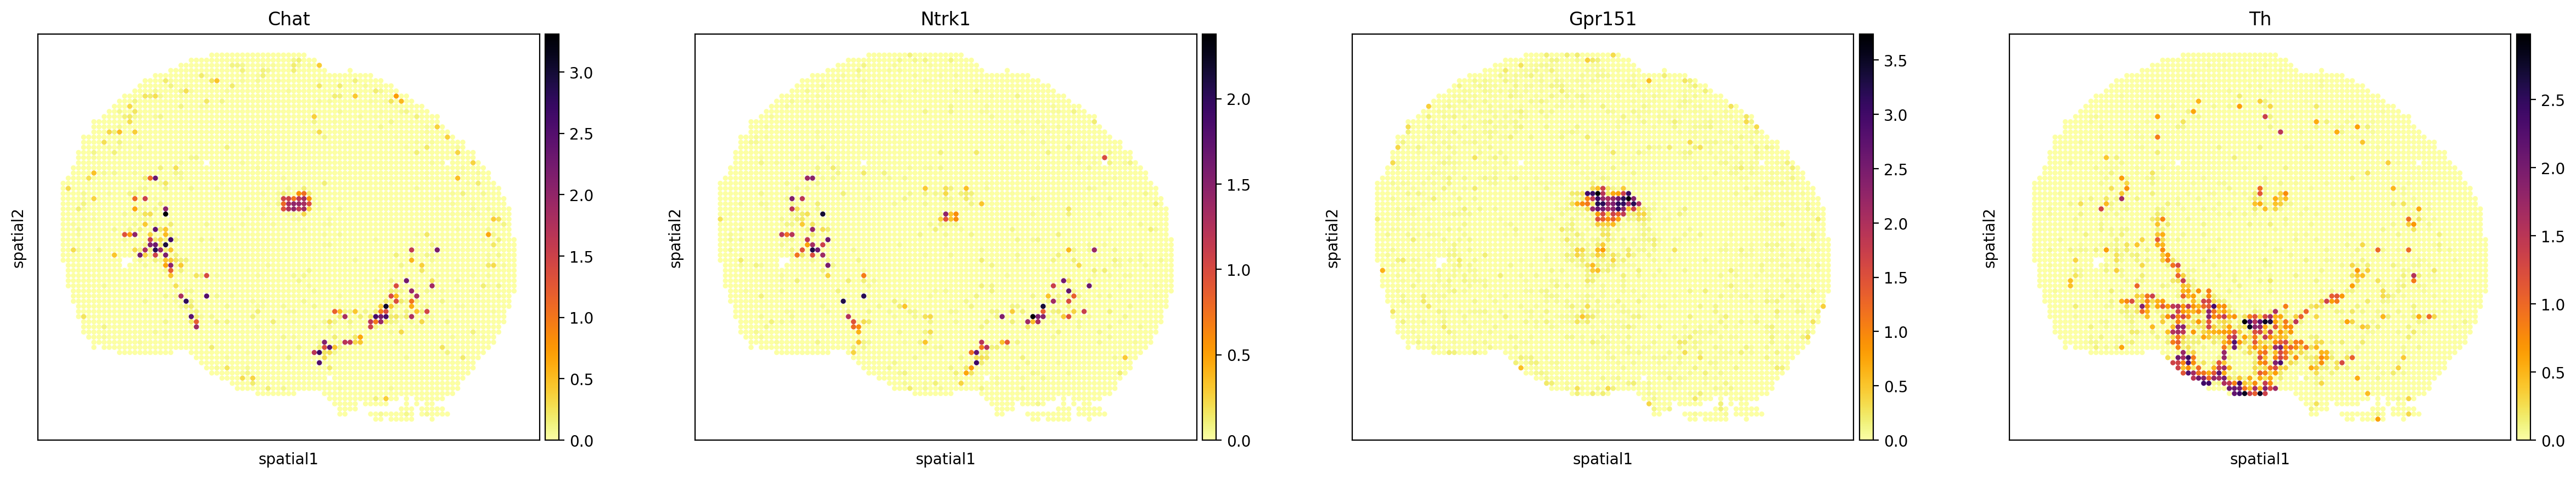

In [7]:
genes_list = ['Chat', 'Ntrk1', 'Gpr151', 'Th']

sc.pl.spatial(ad_spot, spot_size=100, color=genes_list, cmap='inferno_r')